#### Cap negative amount, add minimum charge

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

In [2]:
#pip install pyarrow

In [3]:
#pip install fastparquet

In [4]:
os.getcwd()

'C:\\Users\\abhed\\PGA30\\Python\\Machine Learning\\Regression'

In [5]:
os.chdir(r"C:\Users\abhed\OneDrive\Desktop\Advet\Imarticus\Python\LinearRegression")

In [6]:
os.listdir()

['data_dictionary_trip_records_yellow.pdf',
 'kc_house_data.csv',
 'LinearRegression_car.ipynb',
 'yellow_tripdata_2022_nov.parquet']

In [7]:
taxi=pd.read_parquet("yellow_tripdata_2022_nov.parquet")

In [8]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252717 entries, 0 to 3252716
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [9]:
taxi.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.60,1.0,N,151,151,2,4.5,0.5,0.5,0.00,0.00,0.3,5.80,0.0,0.00
1,1,2022-11-01 00:39:43,2022-11-01 00:48:44,0.0,1.80,1.0,N,90,79,1,8.5,3.0,0.5,3.05,0.00,0.3,15.35,2.5,0.00
2,1,2022-11-01 00:55:01,2022-11-01 01:01:35,0.0,2.00,1.0,N,137,141,1,8.0,3.0,0.5,2.36,0.00,0.3,14.16,2.5,0.00
3,1,2022-11-01 00:24:49,2022-11-01 00:31:04,2.0,1.00,1.0,N,158,113,1,6.0,3.0,0.5,0.00,0.00,0.3,9.80,2.5,0.00
4,1,2022-11-01 00:37:32,2022-11-01 00:42:23,2.0,0.80,1.0,N,249,158,2,5.5,3.0,0.5,0.00,0.00,0.3,9.30,2.5,0.00
5,1,2022-11-01 00:48:53,2022-11-01 01:02:00,2.0,2.50,1.0,N,158,230,1,11.0,3.0,0.5,2.95,0.00,0.3,17.75,2.5,0.00
6,2,2022-11-01 00:13:50,2022-11-01 00:23:06,1.0,2.04,1.0,N,161,137,2,9.0,0.5,0.5,0.00,0.00,0.3,12.80,2.5,0.00
7,2,2022-11-01 00:07:31,2022-11-01 00:21:54,1.0,6.63,1.0,N,138,74,1,20.0,0.5,0.5,5.57,6.55,0.3,34.67,0.0,1.25
8,2,2022-11-01 00:47:57,2022-11-01 00:50:57,2.0,0.53,1.0,N,48,161,2,4.0,0.5,0.5,0.00,0.00,0.3,7.80,2.5,0.00
9,2,2022-11-01 00:37:05,2022-11-01 00:43:18,1.0,1.06,1.0,N,68,170,2,6.0,0.5,0.5,0.00,0.00,0.3,9.80,2.5,0.00


### EDA

#### Univariate

In [10]:
def numeric(data,vari):
    result={"Missing": data[vari].isnull().sum(),
           "Min": data[vari].min(),
           "max":data[vari].max(),
           "mean":data[vari].mean(),
           "standard deviation":data[vari].std(),
           "variance":data[vari].var(),
           "skewness":data[vari].skew(),
           "kurtosis":data[vari].kurt(),
           "25th Percentile":data[vari].quantile(0.25),
           "50th Percentile":data[vari].quantile(0.5),
           "75th Percentile":data[vari].quantile(0.75)
           }
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    sns.histplot(data[vari])
    plt.subplot(122)
    sns.boxplot(data=data,y=vari)
    plt.show()
    return result

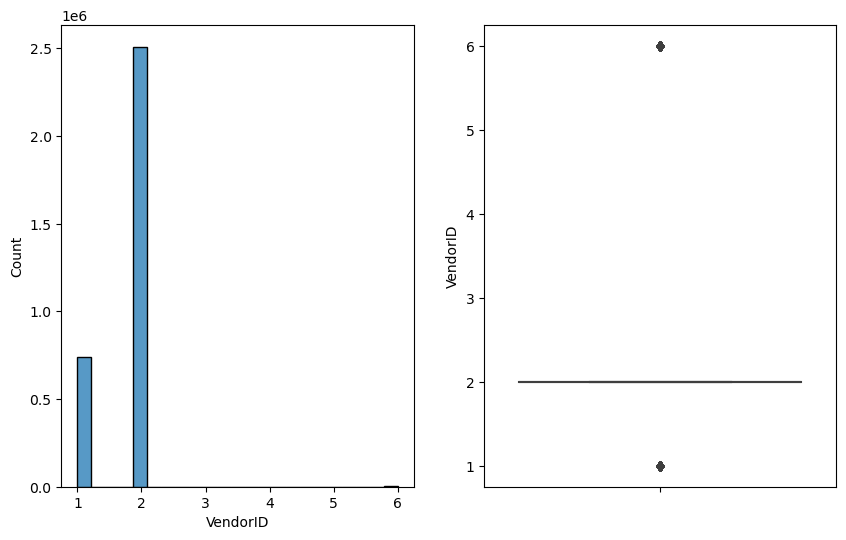

{'Missing': 0,
 'Min': 1,
 'max': 6,
 'mean': 1.7780406349522568,
 'standard deviation': 0.4477424705170382,
 'variance': 0.2004733199047008,
 'skewness': 0.06468320588917015,
 'kurtosis': 10.102088527797157,
 '25th Percentile': 2.0,
 '50th Percentile': 2.0,
 '75th Percentile': 2.0}

In [11]:
numeric(taxi,"VendorID")    #has outliers

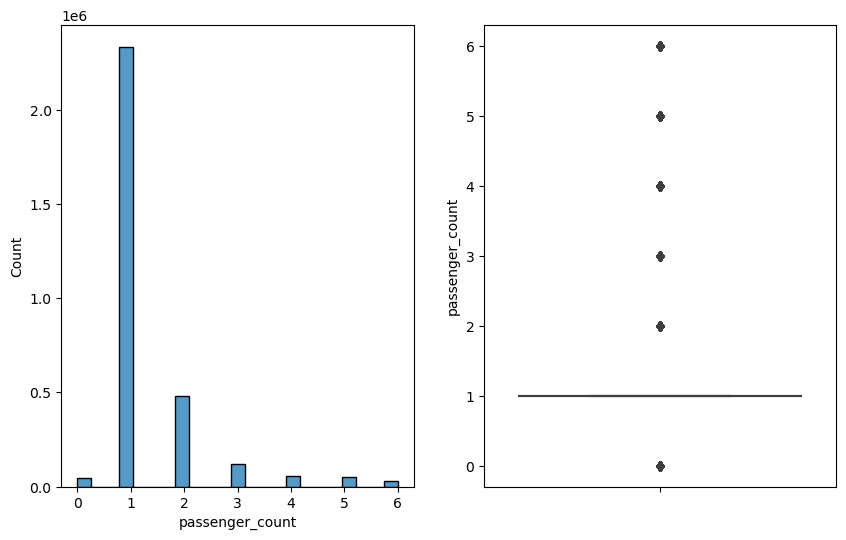

{'Missing': 121958,
 'Min': 0.0,
 'max': 6.0,
 'mean': 1.3929168613745102,
 'standard deviation': 0.9330190971393074,
 'variance': 0.8705246356266483,
 'skewness': 2.7782086647607445,
 'kurtosis': 8.598344811607902,
 '25th Percentile': 1.0,
 '50th Percentile': 1.0,
 '75th Percentile': 1.0}

In [17]:
numeric(taxi,"passenger_count")   #has missing value and outliers

In [13]:
taxi["passenger_count"]=np.where(taxi["passenger_count"]>=6,6,taxi["passenger_count"])

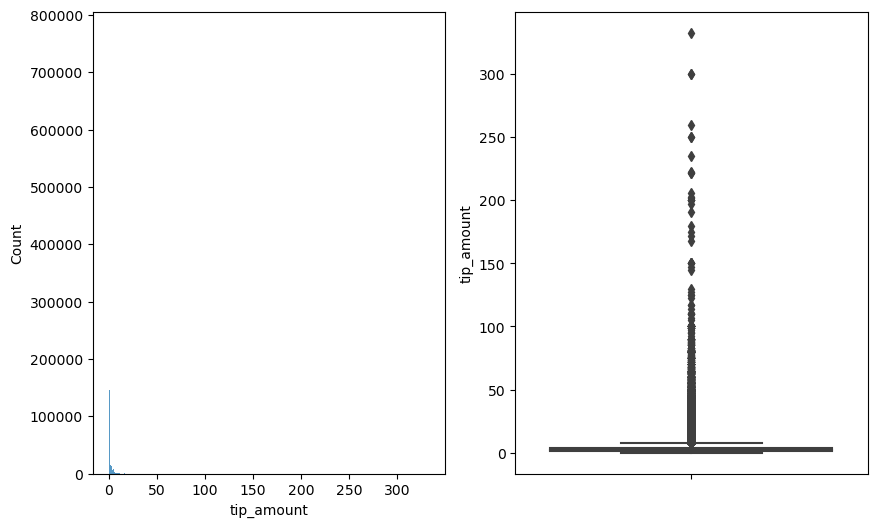

{'Missing': 0,
 'Min': 0.0,
 'max': 333.0,
 'mean': 2.845999593570546,
 'standard deviation': 3.3130849930192796,
 'variance': 10.976532170969561,
 'skewness': 6.097612720978864,
 'kurtosis': 218.62069171551312,
 '25th Percentile': 1.0,
 '50th Percentile': 2.21,
 '75th Percentile': 3.5}

In [16]:
numeric(taxi,"tip_amount")     #outliers

In [23]:
taxi["tip_amount"]=np.where(taxi["tip_amount"]<=0.0,0.0, taxi["tip_amount"])

#### Feature Engineering

In [24]:
taxi["duration_journey_hours"]=(taxi["tpep_dropoff_datetime"]-taxi["tpep_pickup_datetime"])/pd.Timedelta(hours=1)

In [25]:
taxi["duration_journey_hours"]

0          0.083889
1          0.150278
2          0.109444
3          0.104167
4          0.080833
             ...   
3252712    0.168333
3252713    0.283333
3252714    0.150833
3252715    0.203056
3252716    0.340000
Name: duration_journey_hours, Length: 3252717, dtype: float64

In [26]:
taxi["days"]=(taxi["tpep_dropoff_datetime"]-taxi["tpep_pickup_datetime"]).dt.days

In [27]:
taxi["days"].isnull().sum()

0

* Same day pick and return hence dropping days
* Extracted duration of journey hence dropping datetime columns

In [28]:
taxi["store_and_fwd"]=np.where(taxi["store_and_fwd_flag"]=="N",0,1)

In [29]:
taxi["tolls_amount"]=np.where(taxi["tolls_amount"]<=0.00,0.00,taxi["tolls_amount"])
taxi["trip_distance"]=np.where(taxi["trip_distance"]<=0.00,0.00,taxi["trip_distance"])
taxi["extra"]=np.where(taxi["extra"]<=0.00,0.00,taxi["extra"])
taxi["mta_tax"]=np.where(taxi["mta_tax"]<=0.00,0.00,taxi["mta_tax"])
taxi["fare_amount"]=np.where(taxi["fare_amount"]<=0.00,0.00,taxi["fare_amount"])
taxi["congestion_surcharge"]=np.where(taxi["congestion_surcharge"]<=0.00,0.00,taxi["congestion_surcharge"])
taxi["airport_fee"]=np.where(taxi["airport_fee"]<=0.00,0.00,taxi["airport_fee"])

In [30]:
taxi.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_journey_hours,days,store_and_fwd
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.60,1.0,N,151,151,2,...,0.5,0.00,0.00,0.3,5.80,0.0,0.00,0.083889,0,0
1,1,2022-11-01 00:39:43,2022-11-01 00:48:44,0.0,1.80,1.0,N,90,79,1,...,0.5,3.05,0.00,0.3,15.35,2.5,0.00,0.150278,0,0
2,1,2022-11-01 00:55:01,2022-11-01 01:01:35,0.0,2.00,1.0,N,137,141,1,...,0.5,2.36,0.00,0.3,14.16,2.5,0.00,0.109444,0,0
3,1,2022-11-01 00:24:49,2022-11-01 00:31:04,2.0,1.00,1.0,N,158,113,1,...,0.5,0.00,0.00,0.3,9.80,2.5,0.00,0.104167,0,0
4,1,2022-11-01 00:37:32,2022-11-01 00:42:23,2.0,0.80,1.0,N,249,158,2,...,0.5,0.00,0.00,0.3,9.30,2.5,0.00,0.080833,0,0
5,1,2022-11-01 00:48:53,2022-11-01 01:02:00,2.0,2.50,1.0,N,158,230,1,...,0.5,2.95,0.00,0.3,17.75,2.5,0.00,0.218611,0,0
6,2,2022-11-01 00:13:50,2022-11-01 00:23:06,1.0,2.04,1.0,N,161,137,2,...,0.5,0.00,0.00,0.3,12.80,2.5,0.00,0.154444,0,0
7,2,2022-11-01 00:07:31,2022-11-01 00:21:54,1.0,6.63,1.0,N,138,74,1,...,0.5,5.57,6.55,0.3,34.67,0.0,1.25,0.239722,0,0
8,2,2022-11-01 00:47:57,2022-11-01 00:50:57,2.0,0.53,1.0,N,48,161,2,...,0.5,0.00,0.00,0.3,7.80,2.5,0.00,0.050000,0,0
9,2,2022-11-01 00:37:05,2022-11-01 00:43:18,1.0,1.06,1.0,N,68,170,2,...,0.5,0.00,0.00,0.3,9.80,2.5,0.00,0.103611,0,0


In [31]:
taxi1=taxi.drop(columns=["days","tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"])

In [32]:
taxi1

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_journey_hours,store_and_fwd
0,1,1.0,0.6,1.0,151,151,2,4.50,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0,0.083889,0
1,1,0.0,1.8,1.0,90,79,1,8.50,3.0,0.5,3.05,0.0,0.3,15.35,2.5,0.0,0.150278,0
2,1,0.0,2.0,1.0,137,141,1,8.00,3.0,0.5,2.36,0.0,0.3,14.16,2.5,0.0,0.109444,0
3,1,2.0,1.0,1.0,158,113,1,6.00,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0,0.104167,0
4,1,2.0,0.8,1.0,249,158,2,5.50,3.0,0.5,0.00,0.0,0.3,9.30,2.5,0.0,0.080833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252712,1,NaN,0.0,NaN,144,249,0,13.46,0.0,0.5,0.00,0.0,0.3,16.76,NaN,NaN,0.168333,1
3252713,2,NaN,4.1,NaN,45,106,0,13.59,0.0,0.5,2.00,0.0,0.3,18.89,NaN,NaN,0.283333,1
3252714,1,NaN,1.4,NaN,163,141,0,8.00,0.5,0.5,1.18,0.0,0.3,12.98,NaN,NaN,0.150833,1
3252715,1,NaN,2.5,NaN,161,143,0,10.50,0.5,0.5,2.15,0.0,0.3,16.45,NaN,NaN,0.203056,1


#### MVT

In [33]:
def missing(data):
    miss=pd.DataFrame(data.isnull().sum(), columns=["Missing_count"]).reset_index()
    miss["Missing_percentage"]=(round(miss["Missing_count"]/data.shape[0]*100,2)).astype("str")+str("%")
    miss0=miss[miss["Missing_count"]>0].sort_values(by=["Missing_count"], ascending=False)
    return miss0

In [34]:
missing(taxi1)

,index,Missing_count,Missing_percentage
1,passenger_count,121958,3.75%
3,RatecodeID,121958,3.75%
14,congestion_surcharge,121958,3.75%
15,airport_fee,121958,3.75%


In [35]:
taxi1.fillna(taxi1.mean(), inplace=True)
missing(taxi1)

,index,Missing_count,Missing_percentage


#### Outliers

In [36]:
def outlier_method(data):
    data=data.clip(upper=data.quantile(0.95))
    data=data.clip(lower=data.quantile(0.01))
    return data

In [37]:
num_data=taxi1[taxi1.dtypes[taxi1.dtypes!="object"].index]

In [38]:
obj_data=taxi1[taxi1.dtypes[taxi1.dtypes=="object"].index]

In [39]:
num_data.apply(outlier_method)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_journey_hours,store_and_fwd
0,1,1.000000,0.6,1.000000,151,151,2,4.50,0.5,0.5,0.00,0.0,0.3,5.80,0.000000,0.000000,0.083889,0
1,1,0.000000,1.8,1.000000,90,79,1,8.50,3.0,0.5,3.05,0.0,0.3,15.35,2.500000,0.000000,0.150278,0
2,1,0.000000,2.0,1.000000,137,141,1,8.00,3.0,0.5,2.36,0.0,0.3,14.16,2.500000,0.000000,0.109444,0
3,1,2.000000,1.0,1.000000,158,113,1,6.00,3.0,0.5,0.00,0.0,0.3,9.80,2.500000,0.000000,0.104167,0
4,1,2.000000,0.8,1.000000,249,158,2,5.50,3.0,0.5,0.00,0.0,0.3,9.30,2.500000,0.000000,0.080833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252712,1,1.392917,0.0,1.367043,144,249,0,13.46,0.0,0.5,0.00,0.0,0.3,16.76,2.298557,0.106711,0.168333,0
3252713,2,1.392917,4.1,1.367043,45,106,0,13.59,0.0,0.5,2.00,0.0,0.3,18.89,2.298557,0.106711,0.283333,0
3252714,1,1.392917,1.4,1.367043,163,141,0,8.00,0.5,0.5,1.18,0.0,0.3,12.98,2.298557,0.106711,0.150833,0
3252715,1,1.392917,2.5,1.367043,161,143,0,10.50,0.5,0.5,2.15,0.0,0.3,16.45,2.298557,0.106711,0.203056,0


In [40]:
taxi_final=pd.concat([obj_data, num_data],axis=1)

In [41]:
taxi_final

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_journey_hours,store_and_fwd
0,1,1.000000,0.6,1.000000,151,151,2,4.50,0.5,0.5,0.00,0.0,0.3,5.80,0.000000,0.000000,0.083889,0
1,1,0.000000,1.8,1.000000,90,79,1,8.50,3.0,0.5,3.05,0.0,0.3,15.35,2.500000,0.000000,0.150278,0
2,1,0.000000,2.0,1.000000,137,141,1,8.00,3.0,0.5,2.36,0.0,0.3,14.16,2.500000,0.000000,0.109444,0
3,1,2.000000,1.0,1.000000,158,113,1,6.00,3.0,0.5,0.00,0.0,0.3,9.80,2.500000,0.000000,0.104167,0
4,1,2.000000,0.8,1.000000,249,158,2,5.50,3.0,0.5,0.00,0.0,0.3,9.30,2.500000,0.000000,0.080833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252712,1,1.392917,0.0,1.367043,144,249,0,13.46,0.0,0.5,0.00,0.0,0.3,16.76,2.298557,0.106711,0.168333,1
3252713,2,1.392917,4.1,1.367043,45,106,0,13.59,0.0,0.5,2.00,0.0,0.3,18.89,2.298557,0.106711,0.283333,1
3252714,1,1.392917,1.4,1.367043,163,141,0,8.00,0.5,0.5,1.18,0.0,0.3,12.98,2.298557,0.106711,0.150833,1
3252715,1,1.392917,2.5,1.367043,161,143,0,10.50,0.5,0.5,2.15,0.0,0.3,16.45,2.298557,0.106711,0.203056,1


In [43]:
taxi_final["total_amount"]=np.where(taxi_final["total_amount"]<=0.00,0.00, taxi_final["total_amount"])

### Assumptions

#### 1. Y should be normally distributed

In [49]:
stats.jarque_bera(taxi_final["total"])

Jarque_beraResult(statistic=2371886.8051338904, pvalue=0.0)

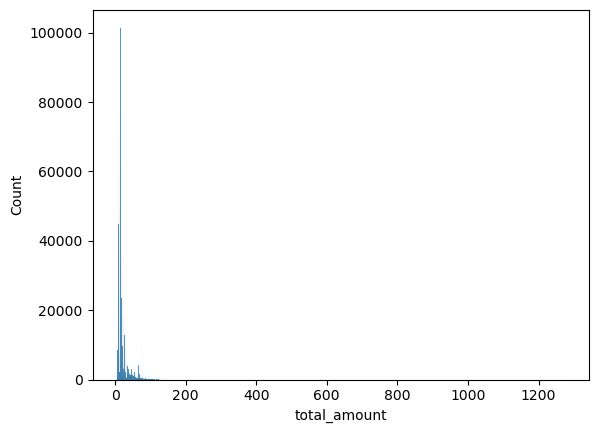

In [45]:
sns.histplot(taxi_final["total_amount"])
y=taxi_final["total_amount"]

In [46]:
taxi_final["total"]=np.log1p(taxi_final["total_amount"])

<AxesSubplot:xlabel='total', ylabel='Count'>

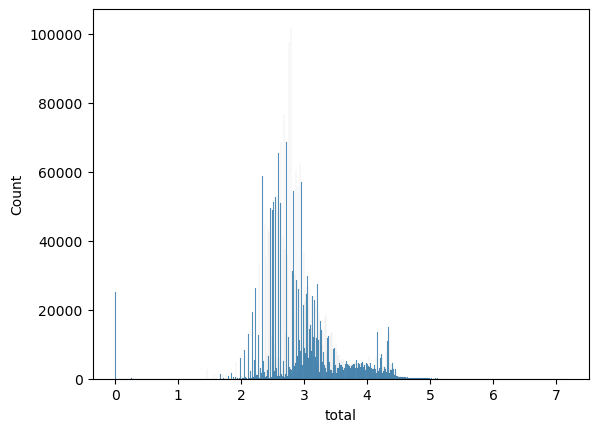

In [47]:
sns.histplot(taxi_final["total"])

In [33]:
#t1=taxi_final["total_amount"]**(2)    #taking cube root to remove negative values
#power=PowerTransformer(method='yeo-johnson',standardize=True)
#y=np.array(taxi_final["total_amount"])

In [34]:
#y=y.reshape((len(y),1))
#y1=power.fit_transform(y)
#plt.hist(t1)

In [48]:
#taxi_final["total_final"]=y1.reshape(len(y1))

NameError: name 'y1' is not defined

In [ ]:
#plt.hist(taxi_final["total_final"])

In [37]:
taxi_final.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'duration_journey_hours', 'store_and_fwd', 'total_final'],
      dtype='object')

In [66]:
x=taxi_final[['VendorID', 'passenger_count',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'fare_amount', 'congestion_surcharge', 'airport_fee',
       'duration_journey_hours','store_and_fwd', 'RatecodeID']]
y=taxi_final["total"]

x=sm.add_constant(x)

model=sm.OLS(y,x).fit()

print(model.summary())    #dropping trip_distance as it's pvalue>alpha

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.616e+06
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:21:31   Log-Likelihood:             5.9591e+05
No. Observations:             3252717   AIC:                        -1.192e+06
Df Residuals:                 3252700   BIC:                        -1.192e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

### Using sklearn

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=taxi_final[['trip_distance',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra',
       'tip_amount', 'tolls_amount',
       'fare_amount', 'congestion_surcharge', 'airport_fee',
       'duration_journey_hours','store_and_fwd','passenger_count','RatecodeID']]  #removing improvement_surcharge, mta_tax, vendorID

vif_data=pd.DataFrame()
vif_data["features"]=x.columns

vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif_data.sort_values(by=["VIF"], ascending=False)

,features,VIF
8,congestion_surcharge,10.360999
1,PULocationID,6.884894
2,DOLocationID,6.149818
3,payment_type,5.972746
7,fare_amount,4.915933
5,tip_amount,3.280383
12,passenger_count,3.191025
9,airport_fee,1.784704
6,tolls_amount,1.738654
4,extra,1.582756


In [53]:
y=taxi_final["total"]
x=x=taxi_final[['trip_distance',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra',
       'tip_amount', 'tolls_amount',
       'fare_amount', 'congestion_surcharge', 'airport_fee',
       'duration_journey_hours','store_and_fwd','passenger_count','RatecodeID']]

In [54]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [55]:
linReg=LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression()

In [56]:
linReg.fit(x_test, y_test)

LinearRegression()

In [57]:
linReg.score(x_train,y_train)

0.8199789802082347

In [58]:
linReg.score(x_test,y_test)

0.8214056992424809

In [59]:
pred_train=linReg.predict(x_train)
pred_test=linReg.predict(x_test)

In [60]:
metrics.mean_squared_error(y_train,pred_train)

0.0654600167448678

In [61]:
metrics.mean_squared_error(y_test,pred_test)

0.064685426965765

In [62]:
predict=pd.DataFrame({"Actual":(y_train),
                     "Predicted":(pred_train)})

predict

,Actual,Predicted
1919367,3.233173,3.059203
3057528,3.230804,3.125517
3123539,3.032064,2.969569
3181571,2.893146,3.117507
491113,2.636196,2.721723
...,...,...
2249467,2.850707,2.662076
963395,2.678278,2.777487
2215104,2.830858,2.786228
1484405,3.039271,2.946968


<AxesSubplot:>

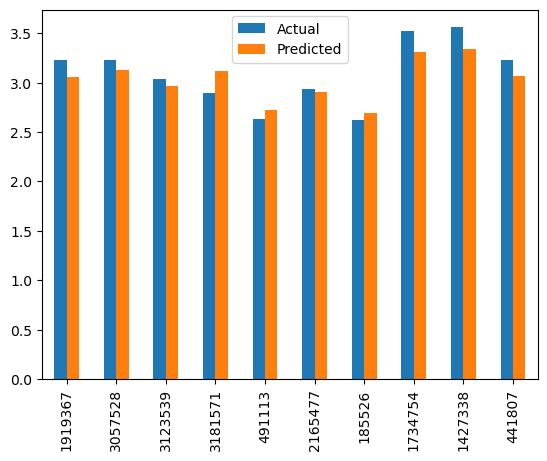

In [63]:
predict.head(10).plot(kind="bar")